Analysing Data

In [3]:
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import pandas as pd

In [4]:
titanic_data = sns.load_dataset('titanic')

In [5]:
titanic_data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
titanic_data.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [7]:
titanic_data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [9]:
titanic_data.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [10]:
missing_percent = titanic_data.isnull().mean() * 100
missing_percent

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

In [11]:
titanic_data.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [12]:
numerical_cols = titanic_data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = titanic_data.select_dtypes(include=['object', 'category', 'bool']).columns

numerical_cols, categorical_cols


(Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare'], dtype='object'),
 Index(['sex', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
        'alive', 'alone'],
       dtype='object'))

In [13]:
Q1 = titanic_data[numerical_cols].quantile(0.25)
Q3 = titanic_data[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((titanic_data[numerical_cols] < (Q1 - 1.5 * IQR)) | 
            (titanic_data[numerical_cols] > (Q3 + 1.5 * IQR))).sum()

outliers


survived      0
pclass        0
age          11
sibsp        46
parch       213
fare        116
dtype: int64

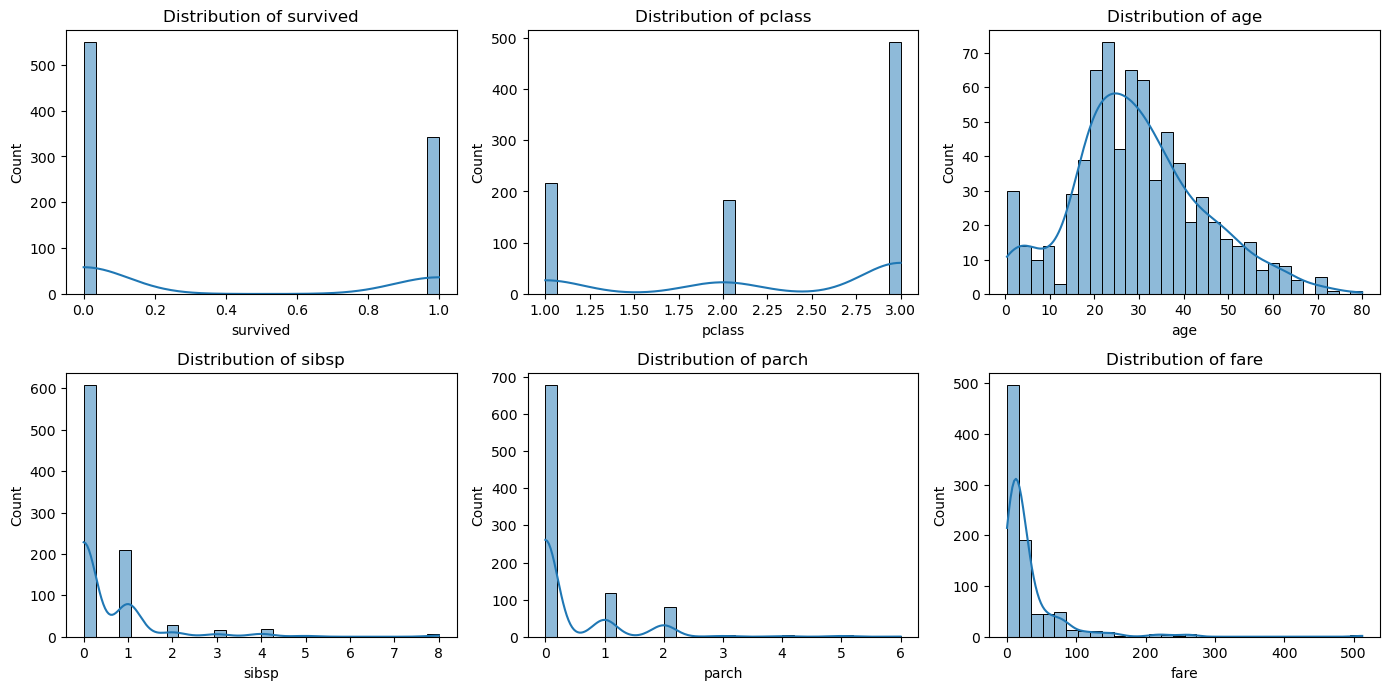

In [14]:
plt.figure(figsize=(14, 10))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(titanic_data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


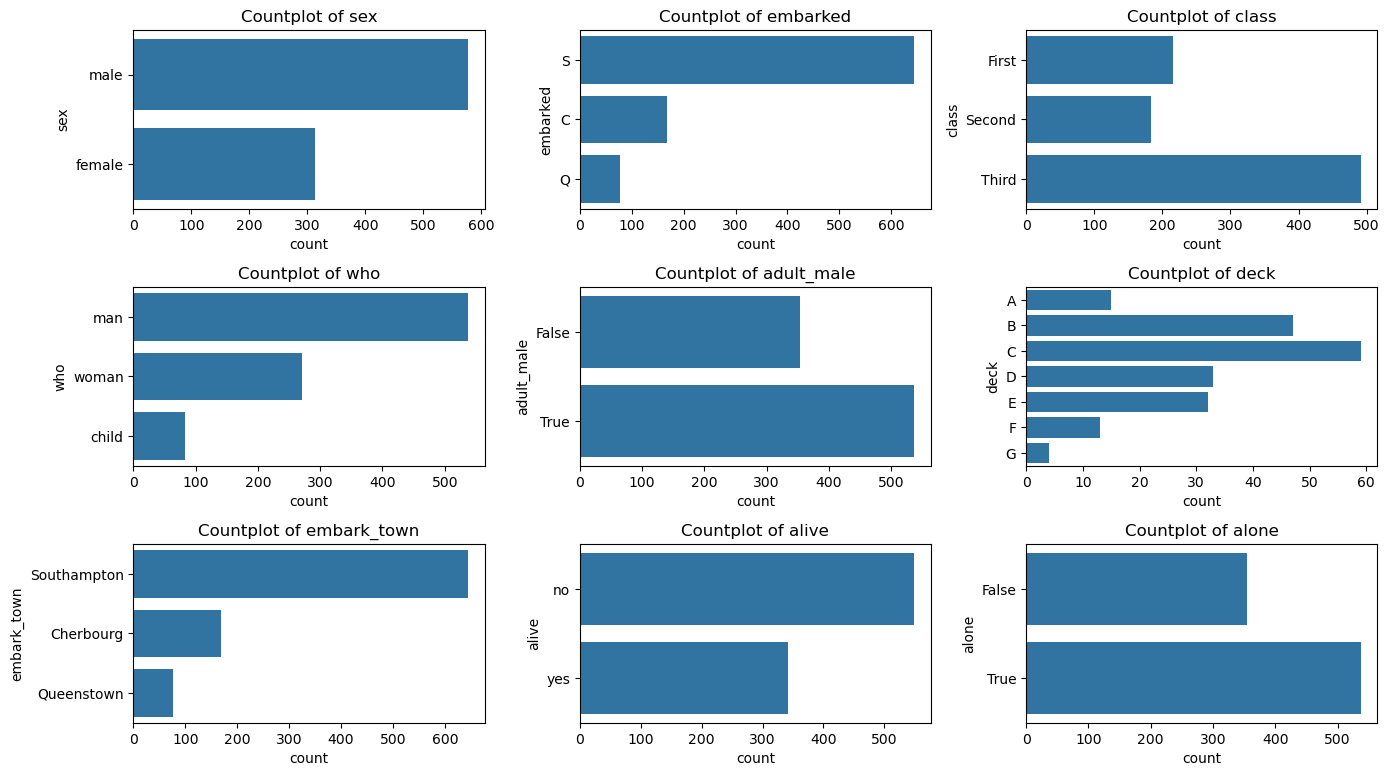

In [15]:
plt.figure(figsize=(14, 10))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 3, i)
    sns.countplot(y=titanic_data[col])
    plt.title(f'Countplot of {col}')
    plt.tight_layout()

plt.show()


In [16]:
num_df = titanic_data.select_dtypes(include=['int64', 'float64'])

corr = num_df.corr()['survived'].sort_values(ascending=False)
corr

survived    1.000000
fare        0.257307
parch       0.081629
sibsp      -0.035322
age        -0.077221
pclass     -0.338481
Name: survived, dtype: float64

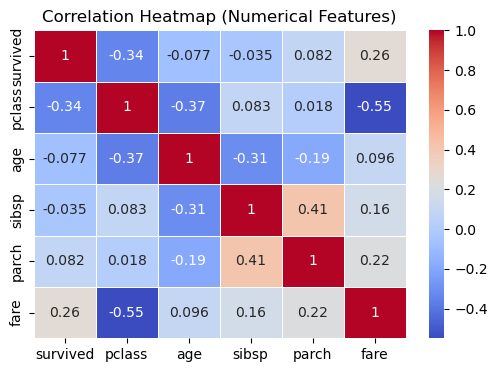

In [17]:
plt.figure(figsize=(6,4))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap (Numerical Features)')
plt.show()


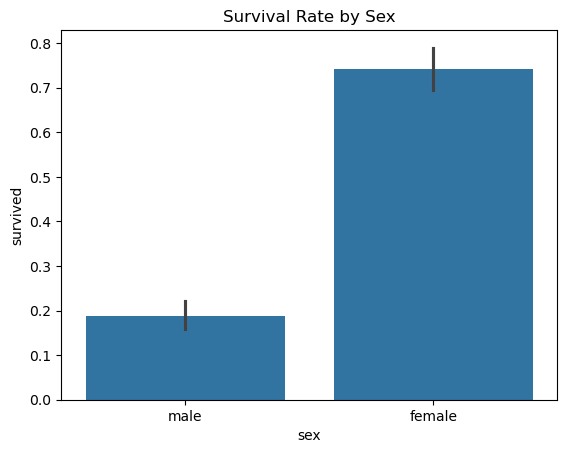

In [18]:
sns.barplot(data=titanic_data, x='sex', y='survived')
plt.title('Survival Rate by Sex')
plt.show()


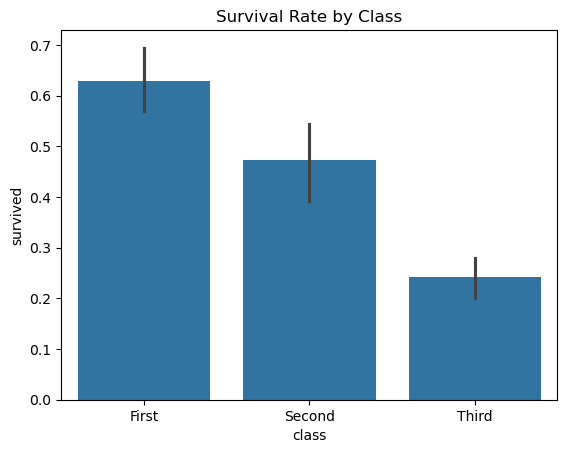

In [19]:
sns.barplot(data=titanic_data, x='class', y='survived')
plt.title('Survival Rate by Class')
plt.show()


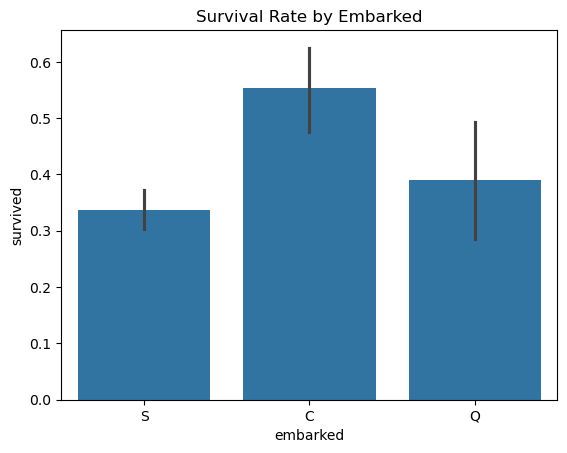

In [20]:
sns.barplot(data=titanic_data, x='embarked', y='survived')
plt.title('Survival Rate by Embarked')
plt.show()


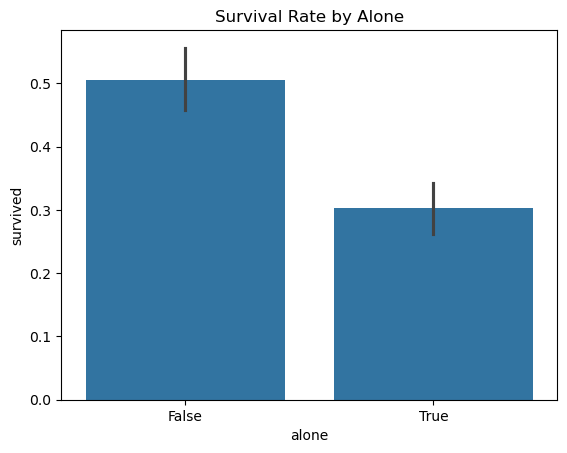

In [21]:
sns.barplot(data=titanic_data, x='alone', y='survived')
plt.title('Survival Rate by Alone')
plt.show()


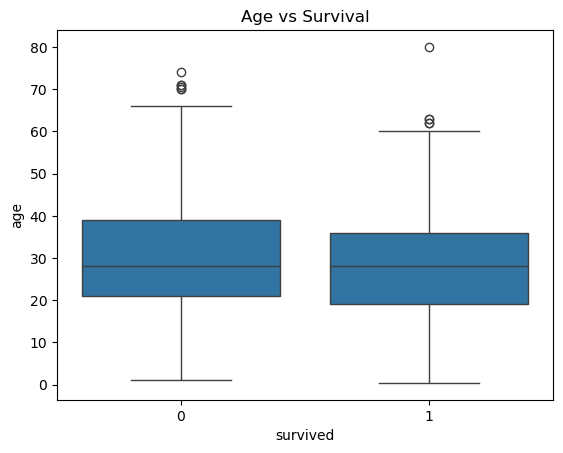

In [22]:
sns.boxplot(data=titanic_data, x='survived', y='age')
plt.title('Age vs Survival')
plt.show()


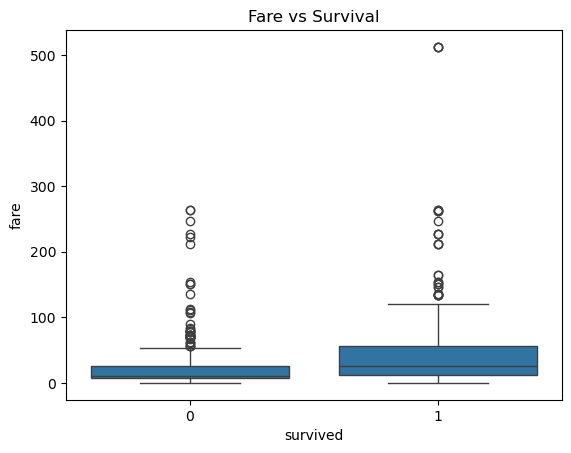

In [23]:
sns.boxplot(data=titanic_data, x='survived', y='fare')
plt.title('Fare vs Survival')
plt.show()


Data Cleaning

In [24]:
titanic_data['age'] = titanic_data['age'].fillna(titanic_data['age'].median())

In [25]:
titanic_data['fare'] = titanic_data['fare'].fillna(titanic_data['fare'].median())

In [26]:
titanic_data['embarked'] = titanic_data['embarked'].fillna(titanic_data['embarked'].mode()[0])

In [27]:
titanic_data['embark_town'] = titanic_data['embark_town'].fillna(titanic_data['embark_town'].mode()[0])

In [28]:
titanic_data.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
dtype: int64

In [29]:
titanic_data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [30]:
titanic_data.duplicated().sum()

np.int64(110)

In [31]:
titanic_data = titanic_data.drop_duplicates()

In [32]:
titanic_data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [33]:
titanic_data.duplicated().sum()

np.int64(0)

In [34]:
titanic_data.columns.tolist()

['survived',
 'pclass',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

In [35]:
titanic_data.columns.tolist()

['survived',
 'pclass',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'embarked',
 'class',
 'who',
 'adult_male',
 'deck',
 'embark_town',
 'alive',
 'alone']

In [36]:
columns_to_drop = ['alive','deck', 'embark_town', 'who', 'adult_male', 'class', 'alone']

titanic_data = titanic_data.drop(columns=columns_to_drop)


Feature Engineering

In [37]:
titanic_data['FamilySize'] = titanic_data['sibsp'] + titanic_data['parch'] + 1

In [38]:
titanic_data['IsAlone'] = (titanic_data['FamilySize'] == 1).astype(int)

In [39]:
titanic_data.columns.tolist()

['survived',
 'pclass',
 'sex',
 'age',
 'sibsp',
 'parch',
 'fare',
 'embarked',
 'FamilySize',
 'IsAlone']

this database contain no names so we can't do Mr and Mrs

In [41]:
#Helps models capture non linear relationships.
titanic_data['AgeGroup'] = pd.cut(
    titanic_data['age'],
    bins=[0, 12, 18, 35, 60, 100],
    labels=['Child', 'Teen', 'YoungAdult', 'Adult', 'Senior']
)

In [42]:
titanic_data['FareGroup'] = pd.qcut(
    titanic_data['fare'], 
    q=4, 
    labels=['Low', 'Medium', 'High', 'VeryHigh']
)

In [43]:
titanic_data['FamilySize'] = titanic_data['sibsp'] + titanic_data['parch'] + 1

In [44]:
titanic_data['IsAlone'] = (titanic_data['FamilySize'] == 1).astype(int)

In [45]:
titanic_data['ClassSex'] = titanic_data['pclass'].astype(str) + "_" + titanic_data['sex']

In [46]:
titanic_data['Age_class'] = titanic_data['age'] * titanic_data['pclass']

In [47]:
titanic_data['Relatives'] = titanic_data['sibsp'] + titanic_data['parch']

In [48]:
titanic_data['IsChild'] = (titanic_data['age'] < 12).astype(int)

In [49]:
titanic_data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,FamilySize,IsAlone,AgeGroup,FareGroup,ClassSex,Age_class,Relatives,IsChild
0,0,3,male,22.0,1,0,7.2500,S,2,0,YoungAdult,Low,3_male,66.0,1,0
1,1,1,female,38.0,1,0,71.2833,C,2,0,Adult,VeryHigh,1_female,38.0,1,0
2,1,3,female,26.0,0,0,7.9250,S,1,1,YoungAdult,Low,3_female,78.0,0,0
3,1,1,female,35.0,1,0,53.1000,S,2,0,YoungAdult,VeryHigh,1_female,35.0,1,0
4,0,3,male,35.0,0,0,8.0500,S,1,1,YoungAdult,Low,3_male,105.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,6,0,Adult,High,3_female,117.0,5,0
887,1,1,female,19.0,0,0,30.0000,S,1,1,YoungAdult,High,1_female,19.0,0,0
888,0,3,female,28.0,1,2,23.4500,S,4,0,YoungAdult,High,3_female,84.0,3,0
889,1,1,male,26.0,0,0,30.0000,C,1,1,YoungAdult,High,1_male,26.0,0,0


In [52]:
titanic_data = titanic_data.drop(columns=[
    'sibsp',
    'parch',
    'Relatives',
    'AgeGroup',
    'FareGroup'
], errors='ignore')

In [53]:
titanic_data.columns.tolist()

['survived',
 'pclass',
 'sex',
 'age',
 'fare',
 'embarked',
 'FamilySize',
 'IsAlone',
 'ClassSex',
 'Age_class',
 'IsChild']

Categorical Encoding

In [54]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
titanic_data['sex'] = le.fit_transform(titanic_data['sex'])

In [55]:
titanic_data = pd.get_dummies(
    titanic_data,
    columns=['embarked', 'ClassSex'],
    drop_first=True
)

In [60]:
titanic_data = titanic_data.astype({col: int for col in titanic_data.select_dtypes('bool').columns})

In [61]:
titanic_data.dtypes

survived               int64
pclass                 int64
sex                    int64
age                  float64
fare                 float64
FamilySize             int64
IsAlone                int64
Age_class            float64
IsChild                int64
embarked_Q             int64
embarked_S             int64
ClassSex_1_male        int64
ClassSex_2_female      int64
ClassSex_2_male        int64
ClassSex_3_female      int64
ClassSex_3_male        int64
dtype: object

Outlier Handling

In [62]:
def detect_outliers_IQR(column):
    Q1 = titanic_data[column].quantile(0.25)
    Q3 = titanic_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = titanic_data[(titanic_data[column] < lower) | (titanic_data[column] > upper)]
    return outliers

outliers_age = detect_outliers_IQR('age')
outliers_fare = detect_outliers_IQR('fare')
outliers_age_class = detect_outliers_IQR('Age_class')

len(outliers_age), len(outliers_fare), len(outliers_age_class)

(39, 102, 7)

In [63]:
titanic_data[['age','fare','Age_class']].skew()

age          0.446558
fare         4.565930
Age_class    0.751438
dtype: float64

In [64]:
titanic_data['fare_log'] = np.log1p(titanic_data['fare']) 
titanic_data['Age_class_log'] = np.log1p(titanic_data['Age_class'])

Scaling and normalization

In [67]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cols_to_scale = ['age', 'fare_log', 'Age_class_log', 'FamilySize']
titanic_data[cols_to_scale] = scaler.fit_transform(titanic_data[cols_to_scale])

Split to Test/Train

In [68]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = titanic_data.drop(columns=['survived'])
y = titanic_data['survived']

# Stratified split (keeps survival ratios similar in train and test sets)
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=0.20,        
    random_state=42,       # reproducible results
    stratify=y             # IMPORTANT: maintains class balance
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((624, 17), (157, 17), (624,), (157,))

Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Model
log_reg = LogisticRegression(max_iter=2000)

# Train
log_reg.fit(X_train, y_train)

# Predict
y_pred_log = log_reg.predict(X_test)

# Evaluate
log_reg_accuracy = accuracy_score(y_test, y_pred_log)

print("Logistic Regression Accuracy:", log_reg_accuracy)
print(classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 0.8089171974522293
              precision    recall  f1-score   support

           0       0.78      0.93      0.85        92
           1       0.87      0.63      0.73        65

    accuracy                           0.81       157
   macro avg       0.83      0.78      0.79       157
weighted avg       0.82      0.81      0.80       157



K nearest neighbor

In [79]:
from sklearn.neighbors import KNeighborsClassifier

# Model
knn = KNeighborsClassifier(n_neighbors=5) #using k = 11 gives best results

# Train
knn.fit(X_train, y_train)

# Predict
y_pred_knn = knn.predict(X_test)

# Evaluate
knn_accuracy = accuracy_score(y_test, y_pred_knn)

print("KNN Accuracy:", knn_accuracy)
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.6305732484076433
              precision    recall  f1-score   support

           0       0.70      0.64      0.67        92
           1       0.55      0.62      0.58        65

    accuracy                           0.63       157
   macro avg       0.63      0.63      0.63       157
weighted avg       0.64      0.63      0.63       157



Optional Added Random forest Classifier

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8407643312101911
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        92
           1       0.84      0.75      0.80        65

    accuracy                           0.84       157
   macro avg       0.84      0.83      0.83       157
weighted avg       0.84      0.84      0.84       157



Evaluation

In [90]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(name, y_test, y_pred):
    print(f"\n{name}\n")

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Classification Report
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix Plot
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


Logistic Regression

Accuracy: 0.8089171974522293

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.93      0.85        92
           1       0.87      0.63      0.73        65

    accuracy                           0.81       157
   macro avg       0.83      0.78      0.79       157
weighted avg       0.82      0.81      0.80       157



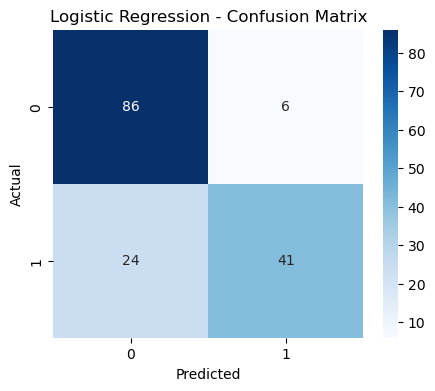


KNN

Accuracy: 0.6305732484076433

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.64      0.67        92
           1       0.55      0.62      0.58        65

    accuracy                           0.63       157
   macro avg       0.63      0.63      0.63       157
weighted avg       0.64      0.63      0.63       157



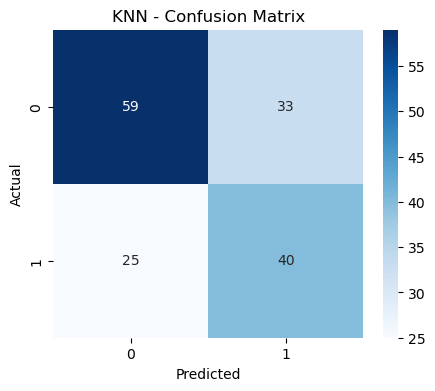


Random Forest Classifier

Accuracy: 0.8407643312101911

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87        92
           1       0.84      0.75      0.80        65

    accuracy                           0.84       157
   macro avg       0.84      0.83      0.83       157
weighted avg       0.84      0.84      0.84       157



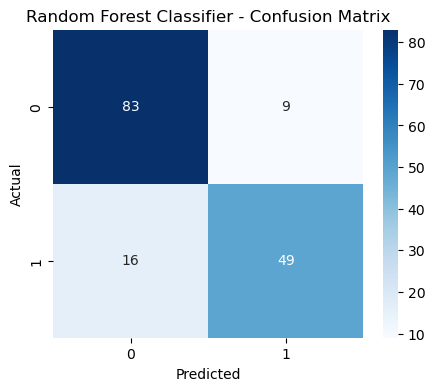

In [93]:
evaluate_model("Logistic Regression", y_test, y_pred_log)
evaluate_model("KNN", y_test, y_pred_knn)
evaluate_model("Random Forest Classifier", y_test, y_pred_rf)